# Piecewise Linear Interpolation

In [1]:
using DrWatson;
@quickactivate "MATH361Lectures";
import MATH361Lectures

In [2]:
using Polynomials, Plots, LaTeXStrings
default(markersize=3,linewidth=1.5);

In [3]:
function build_lagrange(x;nodes,f)
    
    y = f.(nodes);
    np1 = length(nodes);
    pn = 0.0;
    
    for k=1:np1
        xt = copy(nodes);
        deleteat!(xt,k)
        num = x .- xt;
        dom = nodes[k] .- xt;
        Q = (num)./(dom);
        L = prod(Q);
        pn += y[k]*L;
    end
    
    return pn
end   

build_lagrange (generic function with 1 method)

In [4]:
function build_pwl(x;nodes,f)
   
    y = 0.0;
    np1 = length(nodes);
    for l = 1:np1-1
        if nodes[l] <= x && x <= nodes[l+1]
            y = build_lagrange(x;nodes = [nodes[l],nodes[l+1]],f=f);
        end
    end
    
    return y
    
end

build_pwl (generic function with 1 method)

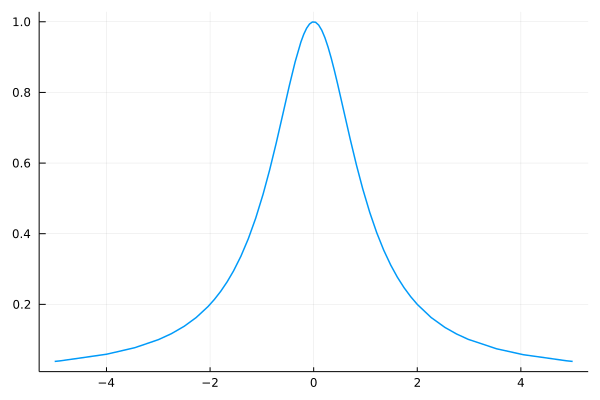

In [5]:
f_runge(x) = 1/(1+x^2);
p = plot(f_runge,-5.0,5.0,legend=false)

In [6]:
n = 15
dx = (5.0 + 5.0)/n
nodes15 = [x for x in -5.0:dx:5.0];
pw_f(x) = build_pwl(x;nodes=nodes15,f=f_runge);

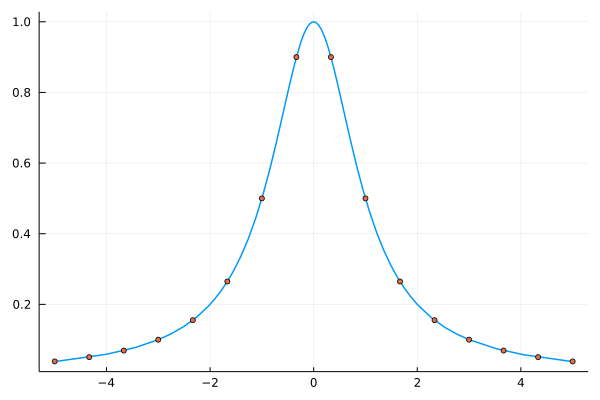

In [7]:
plot!(p,nodes15,f_runge.(nodes15),seriestype = :scatter)

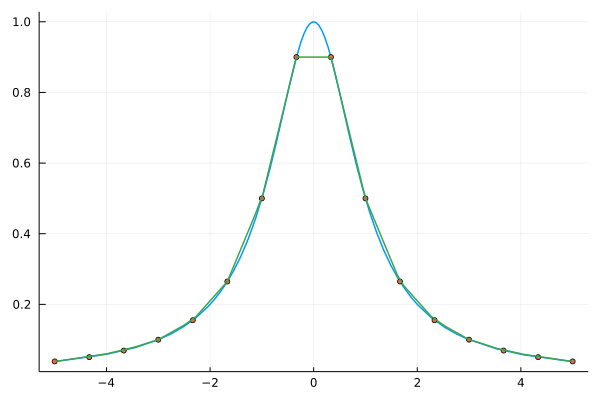

In [8]:
plot!(p,pw_f,-5,5)